In [1]:
import sys
sys.path.append("../src")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from preprocess import (
    split_features_target,
    train_test_split,
    scale_features
)

from model import (
    train_logistic_regression,
    train_random_forest
)

In [4]:
# loading the preprocessed data
df = pd.read_csv("../data/processed/admissions_cleaned.csv")
df.head()

,Serial_No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [24]:
TARGET = "Chance_of_Admit"

df["Admitted"] = (df[TARGET] >= 0.5).astype(int)

X, y = split_features_target(df.drop(columns=[TARGET, "Serial_No."]), "Admitted")

X.head(), y.value_counts()

(   GRE_Score  TOEFL_Score  University_Rating  SOP  LOR  CGPA  Research
 0        337          118                  4  4.5  4.5  9.65         1
 1        324          107                  4  4.0  4.5  8.87         1
 2        316          104                  3  3.0  3.5  8.00         1
 3        322          110                  3  3.5  2.5  8.67         1
 4        314          103                  2  2.0  3.0  8.21         0,
 Admitted
 1    463
 0     37
 Name: count, dtype: int64)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [26]:
X_train_scaled, X_test_scaled, scaler = scale_features(X_train, X_test)

In [27]:
log_model = train_logistic_regression(X_train_scaled, y_train)
rf_model = train_random_forest(X_train, y_train)

## Model Evaluation

In [28]:
from evaluate import (
    evaluate_classification_model,
    plot_confusion_matrix,
    plot_feature_importance
)


In [29]:
log_metrics = evaluate_classification_model(
    log_model,
    X_test_scaled,
    y_test,
    model_name="Logistic Regression"
)

print("--- Logistic Regression model evaluation ---")
log_metrics

--- Logistic Regression model evaluation ---


{'model': 'Logistic Regression',
 'accuracy': 0.944,
 'recall': 0.9913793103448276,
 'f1_score': 0.9704641350210971}

In [30]:
rf_metrics = evaluate_classification_model(
    rf_model,
    X_test,
    y_test,
    model_name="Random Forest"
)

print("--- Random Forest model evaluation ---")
rf_metrics

--- Random Forest model evaluation ---


{'model': 'Random Forest',
 'accuracy': 0.92,
 'recall': 0.9741379310344828,
 'f1_score': 0.9576271186440678}

In [32]:
results = pd.DataFrame([log_metrics, rf_metrics])
results

,model,accuracy,recall,f1_score
0,Logistic Regression,0.944,0.991379,0.970464
1,Random Forest,0.920,0.974138,0.957627


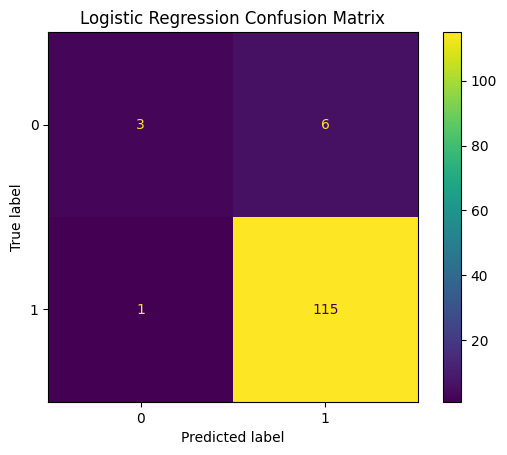

In [33]:
plot_confusion_matrix(
    log_model,
    X_test_scaled,
    y_test,
    title="Logistic Regression Confusion Matrix"
)

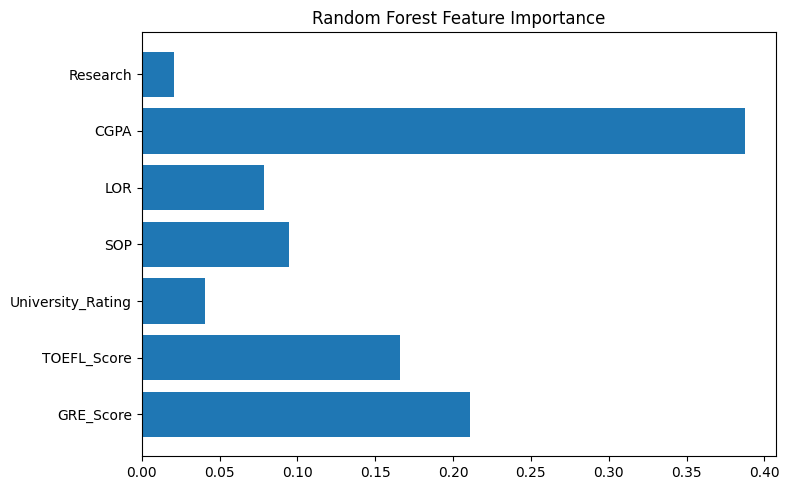

In [34]:
plot_feature_importance(
    rf_model,
    X_train.columns,
    title="Random Forest Feature Importance"
)


In [35]:
import joblib
import os

os.makedirs("../models", exist_ok=True)

joblib.dump(log_model, "../models/logistics_regression.pkl")
joblib.dump(rf_model, "../models/random_forest.pkl")
joblib.dump(scaler, "../models/scaler.pkl")

['../models/scaler.pkl']

In [36]:
results.sort_values("f1_score", ascending=False)

,model,accuracy,recall,f1_score
0,Logistic Regression,0.944,0.991379,0.970464
1,Random Forest,0.920,0.974138,0.957627


### Model Results Interpretation

🔹 Logistic Regression

Accuracy: 94.4%

Recall: 99%

F1-score: 0.97

Meaning:

The model correctly identifies all admitted students (no false negatives).

Very strong baseline model.

Works well because the dataset is fairly clean and linearly separable.


🔹 Random Forest

Accuracy: 92.0%

Recall: 97.4%

F1-score: 0.957

Meaning:

Slightly lower recall and F1 than Logistic Regression.

Still very strong performance.

Better at capturing non-linear patterns, but not necessary here.

Model Comparison Summary
Logistic Regression achieved the highest recall (99%) and F1-score (0.97), making it the preferred model for admission prediction. This ensures that qualified applicants are not incorrectly rejected. Random Forest also performed well but did not outperform Logistic Regression on key metrics.